<h1 align="center"> <b>Travelling Salesman Problem (TSP)</b> </h1>
<h2 align="center"> <i> also called the Travelling Salesperson Problem </i> </h2>
<h2 align="center"> <i> and a bunch of other names… </i> </h2>

<h2>THE ESSENCE OF THE TRAVELING SALESMAN'S TASK </h2>

> <b> The essence of the task </b> is to find the optimal (shortest, fastest or cheapest) path passing through the intermediate points once and returning to the starting point.
>
> Nowadays, when the cost of delivery is often comparable to the cost of the product itself, and the speed of delivery is one of the main priorities, the task of finding the optimal route becomes of great importance.

<div align="center"> <img src="https://i1.wp.com/blog.locus.sh/wp-content/uploads/2020/03/What-is-Traveling-Salesman-Problem__.jpg?fit=1024%2C640&ssl=1" width="500"> </div>

<h2>THE HISTORY OF THE APPEARANCE AND RESEARCH OF THE TRAVELING SALESMAN PROBLEM</h2>

>One of the first to formulate an early version of this problem was the mathematician, physicist and mechanic of the XIX century - William Rowan Hamilton.

<div align="center"> <img src="https://physicsworld.com/wp-content/uploads/2005/08/PWwil1_08-05.jpg" class="center"> <img src="https://upload.wikimedia.org/wikipedia/commons/7/7f/HasslerWhitney-April1973.jpg" width="200"> </div>

>In 1930, the Austrian-American mathematician Karl Menger formulated the traveling salesman problem as "the problem of finding the shortest path between a finite set of places, the distance between which is known".
>
>In 1954, the RAND Corporation Institute formulated the problem as a discrete optimization problem.
>
>In 1972, the American computer scientist Richard Manning Karp proved the NP-completeness of the problem of finding Hamiltonian paths, from which followed the NP-difficulty of the traveling salesman problem.
>
>The record for solving the traveling salesman problem was set in April 2006, when a solution was found for the variant with 85900 cities.
>
>But this is far from the limit!

<h2>TYPES OF TRAVELING SALESMAN TASKS</h2>

* Symmetric TSP
* Asymmetric TSP
* Generalized TSP

<h2>TYPES OF THE TRAVELING SALESMAN'S TASK ON THE CLOSURE OF THE ROUTE:</h2>

* Сlosed
* Unclosed

<h2>METHODS FOR SOLVING THE TRAVELING SALESMAN PROBLEM</h2>

* Brute Force
* Random brute force
* Dynamic programming
* Greedy: Nearest Neighbour, Double Ended Nearest Neighbour, etc.
* Minimum spanning tree method
* Method of simulated annealing
* Ant algorithm
* Genetic algorithm
* The method of branches and boundaries, etc.

<h2>LINEAR PROGRAMMING</h2>

> <b> Linear programming </b>is a branch of mathematical programming devoted to solving problems with a linear objective function and linear constraints. The LP problem can always be solved, the solution is verifiable.
>
> The general problem of linear programming is the problem of finding the minimum of a linear objective function in a linear form:

<div align="center"> <img align="center" src="https://sun9-20.userapi.com/impf/NIj79tv2W76ZcW4hPIOXtwQnOlH2V6Ie48NTaQ/TBKesto75ms.jpg?size=415x75&quality=96&sign=2fbb5a6d93e81ae84fe16d8d940cc610&type=album"> </div>

> A problem in which constraints in the form of inequalities appear is called a basic linear programming problem:

<div align="center"> <img align="center" src="https://sun9-82.userapi.com/impf/qIhq6ImSr2pdDJX9pw_oxwFs6y17tKge3a8xNQ/xseoEQnVQ0o.jpg?size=358x106&quality=96&sign=374f9448526c7b491747b5025978fd85&type=album"> </div>

<h2>MILP</h2>

> <b> Integer linear programming </b> is a branch of linear programming in which the objective function and constraints (other than the integer requirement) are linear. ILP is an NP-hard problem, that is, it has a polynomial-time solution algorithm, it can be solved with a computer (non-deterministic Turing machine) much faster than by direct selection, whose time is exponential.
>
> The two main reasons for using ILP are:
>
> * Integer variables represent quantities that can only be integers.
> * Integer variables represent decisions that take the values 0 or 1.
>
> These conventions are common in practice and thus integer linear programming can be used in many areas, such as production planning, data networks, cellular networks.
>
> <b>Mixed-Integer Linear Programming</b> - mixed integer linear programming. In this, only some of the variables xi require integers, while the rest of the variables can be non-integer.

<h2> Python realization </h2>

>We have used the MIP library.
>
>Python-MIP is a collection of Python tools for modeling and solution mixed-integer linear programming problems. Its syntax was inspired by Pulp, but Python-MIP provides access to advanced solver features such as slicing, lazy constraints, solution pools, and so on. PuLP is a linear programming problem solver written by in python.
<div align="center"> <img align="center" src="https://mchost.ru/files/img/python.png"> </div>

>Branch and cut is a method of combinatorial optimization for solving integer linear programs (ILPs), that is, linear programming (LP) problems where some or all the unknowns are restricted to integer values.
>Branch and cut involves running a branch and bound algorithm and using cutting planes to tighten the linear programming relaxations. 
>Note that if cuts are only used to tighten the initial LP relaxation, the algorithm is called cut and branch.
>Our program solves the Traveling Salesman Problem using the simple compact formulation presented in Miller, C.E., Tucker, A.W and Zemlin, R.A. "Integer Programming Formulation of Traveling Salesman Problems". Journal of the ACM 7(4). 1960."

<h2> Imports </h2>


In [1]:
from typing import Tuple, Set, List
from math import floor, cos, acos
from itertools import product
from collections import defaultdict
from sys import stdout as out
from mip import Model, xsum, minimize, BINARY, ConstrsGenerator, CutPool
import matplotlib.pyplot as plt

<h2> Some additional functions </h2>

* **subtour** checks if a given node belongs to a disconnected sub-route and returns involved nodes

* **SubTourLazyGenerator** generated sub-tour elimination constraints

* **rad** converts to radians

* **dist computes** geographical distance

* **draw** draws a plot

In [2]:
def subtour(N: Set, outa: defaultdict, node) -> List:
    queue = [node]
    visited = set(queue)
    while queue:
        n = queue.pop()
        for nl in outa[n]:
            if nl not in visited:
                queue.append(nl)
                visited.add(nl)

    if len(visited) != len(N):
        return list(visited)
    else:
        return []

class SubTourLazyGenerator(ConstrsGenerator):
    """generated sub-tour elimination constraints"""

    def __init__(self, xv):
        self._x = xv

    def generate_constrs(self, model: Model, depth: int = 0, npass: int = 0):
        x_, N, cp = model.translate(self._x), range(len(self._x)), CutPool()
        outa = [[j for j in N if x_[i][j].x >= 0.99] for i in N]

        for node in N:
            S = set(subtour(N, outa, node))
            if S:
                AS = [(i, j) for (i, j) in product(S, S) if i != j]
                cut = xsum(x_[i][j] for (i, j) in AS) <= len(S) - 1
                cp.add(cut)
        for cut in cp.cuts:
            model += cut

PI = 3.141592
RRR = 6378.388

def rad(val: float) -> float:
    """converts to radians"""
    mult = 1.0
    if val < 0.0:
        mult = -1.0
        val = abs(val)

    deg = float(floor(val))
    minute = val - deg
    return (PI * (deg + 5 * minute / 3) / 180) * mult

def dist(p1: Tuple[float, float], p2: Tuple[float, float]) -> float:
    """computes geographical distance"""
    q1 = cos(p1[1] - p2[1])
    q2 = cos(p1[0] - p2[0])
    q3 = cos(p1[0] + p2[0])
    return int(floor(RRR * acos(0.5 * ((1.0 + q1) * q2 - (1.0 - q1) * q3)) + 1.0))

def draw(x,y):
    plt.plot(x, y)
    plt.scatter(x, y, c='r')
    plt.show()

<h2> Inputing Data </h2>

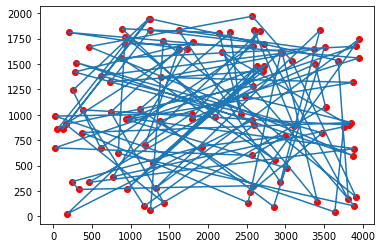

In [3]:
filename = 'Input.txt'

xx=[]
yy=[]
coord =[]
quantity_points = 0

#reading
with open(filename, 'r') as f:
    for line in f:
        if quantity_points == 0:
          quantity_points = int(line) 
        else:
          coord.append([int(line.split()[0]),int(line.split()[1])])
          xx.append(int(line.split()[0]))
          yy.append(int(line.split()[1]))

route = list(range(0,quantity_points))

#input 
draw(xx,yy)

<h2> MILP using MIP </h2>

In [4]:
# latitude and longitude
coord = [(rad(x), rad(y)) for (x, y) in coord]

# distances in an upper triangular matrix

# number of nodes and list of vertices
n, V = len(coord), set(range(len(coord)))

# distances matrix
c = [[0 if i == j else dist(coord[i], coord[j]) for j in V] for i in V]

model = Model()

# binary variables indicating if arc (i,j) is used on the route or not
x = [[model.add_var(var_type=BINARY) for j in V] for i in V]

# objective function: minimize the distance
model.objective = minimize(xsum(c[i][j] * x[i][j] for i in V for j in V))

# constraint : leave each city only once
for i in V:
    model += xsum(x[i][j] for j in V - {i}) == 1

# constraint : enter each city only once
for i in V:
    model += xsum(x[j][i] for j in V - {i}) == 1

model.lazy_constrs_generator = SubTourLazyGenerator(x)

# optimizing
model.optimize(max_seconds=3600)

Welcome to the CBC MILP Solver 
Version: devel 
Build Date: Nov 15 2020 

Starting solution of the Linear programming relaxation problem using Primal Simplex

Coin0506I Presolve 200 (0) rows, 9900 (-100) columns and 19800 (0) elements
Clp1000I sum of infeasibilities 8.10543e-06 - average 4.05271e-08, 9838 fixed columns
Coin0506I Presolve 0 (-200) rows, 0 (-9900) columns and 0 (-19800) elements
Clp0000I Optimal - objective value 134929
Clp0000I Optimal - objective value 134929
Coin0511I After Postsolve, objective 134929, infeasibilities - dual 0 (0), primal 0 (0)
Clp0014I Perturbing problem by 0.001% of 1 - largest nonzero change 2.623149e-05 ( 0.0013115745%) - largest zero change 2.7080466e-05
Clp0000I Optimal - objective value 134929
Clp0000I Optimal - objective value 134929
Clp0000I Optimal - objective value 134929
Coin0511I After Postsolve, objective 134929, infeasibilities - dual 0 (0), primal 0 (0)
Clp0032I Optimal objective 134929 - 0 iterations time 0.102, Presolve 0.01, Idiot 0

<OptimizationStatus.FEASIBLE: 3>

<h2> Outputing the result </h2>

route with total distance 162210 found: 0 -> 51 -> 70 -> 61 -> 98 -> 87 -> 5 -> 91 -> 25 -> 68 -> 33 -> 10 -> 55 -> 1 -> 79 -> 73 -> 52 -> 97 -> 86 -> 47 -> 15 -> 82 -> 50 -> 20 -> 7 -> 96 -> 88 -> 54 -> 67 -> 34 -> 27 -> 62 -> 57 -> 9 -> 40 -> 37 -> 45 -> 28 -> 64 -> 31 -> 90 -> 42 -> 81 -> 14 -> 83 -> 72 -> 43 -> 99 -> 21 -> 39 -> 19 -> 66 -> 12 -> 93 -> 65 -> 13 -> 29 -> 17 -> 6 -> 36 -> 4 -> 41 -> 30 -> 32 -> 53 -> 63 -> 85 -> 35 -> 46 -> 95 -> 44 -> 24 -> 71 -> 16 -> 84 -> 11 -> 74 -> 69 -> 18 -> 78 -> 89 -> 59 -> 80 -> 77 -> 8 -> 60 -> 76 -> 26 -> 75 -> 94 -> 56 -> 92 -> 22 -> 48 -> 58 -> 23 -> 38 -> 3 -> 2 -> 49 -> 0


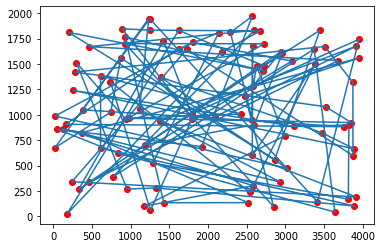

In [5]:
string = '0 '
nx = []
ny = []
nroute = []

# checking if a solution was found
if model.num_solutions:
    out.write(
        "route with total distance %g found: %s" % (model.objective_value, 0)
    )
    nc = 0
    nroute.append(0)
    while True:
        nc = [i for i in V if x[nc][i].x >= 0.99][0]
        out.write(" -> %s" % nc) 
        string = string + str(nc) + ' '
        nroute.append(nc)
        if nc == 0:
            break
    out.write("\n")

#writing output
f = open('Output.txt', 'w')
f.write(str(model.objective_value)+'\n')
f.write(string)
f.close()

for i in range(0, len(nroute)):
  nx.append(xx[nroute[i]])
  ny.append(yy[nroute[i]])

draw(nx,ny)